In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("books.csv",error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [5]:
data.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [6]:
data.drop(["isbn","isbn13","publication_date"],axis=1,inplace=True)

In [7]:
data

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,Scholastic
...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,eng,434,769,139,Ecco


In [8]:
data["publisher"].value_counts(ascending=True)

Macmillan Publishing Company/Collier Books      1
Trine Day                                       1
Heinemann-Octopus                               1
Grafton                                         1
Yesterday's Classics                            1
                                             ... 
Ballantine Books                              144
Mariner Books                                 150
Penguin Classics                              184
Penguin Books                                 261
Vintage                                       318
Name: publisher, Length: 2290, dtype: int64

In [9]:
# many publishers, so better exclude

In [10]:
data.drop("publisher",axis=1,inplace=True)
data=data[data['  num_pages']>30]

In [11]:
data

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164
...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95
11121,45639,Poor People,William T. Vollmann,3.72,eng,434,769,139


![Weighted Average](http://trailerpark.weebly.com/uploads/8/8/5/5/8855465/7628808.png?371#)

In [12]:
def weighted_rating(df):
    v = df['ratings_count']
    R = df['average_rating']
    C = df['average_rating'].mean()
    m = df['ratings_count'].quantile(0.9)
    return (v/(v+m) * R) + (m/(m+v) * C)

In [13]:
data["weighted"]=weighted_rating(data)

<ipython-input-13-a86201df608e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["weighted"]=weighted_rating(data)


In [14]:
data

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,weighted
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,4.562349
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,4.483486
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,4.029831
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,4.553246
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,4.457450
...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,3.933593
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,3.937208
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,3.933666
11121,45639,Poor People,William T. Vollmann,3.72,eng,434,769,139,3.926581


In [15]:
columns=['average_rating','weighted']

In [16]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [17]:
ss=StandardScaler()
imp=ss.fit_transform(data[columns])

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pca_data = pca.fit_transform(imp)
new_df = pd.DataFrame(pca_data)
new_df

,0,1
0,-8.142186,5.551593
1,-7.112190,4.846853
2,-1.980389,-0.000348
3,-8.021736,5.471800
4,-7.415365,3.970974
...,...,...
10810,-0.190094,-0.326990
10811,-0.270515,-0.327883
10812,0.012382,-0.122895
10813,0.578190,0.287067


# DROPPING OUTLIERS

In [19]:
from scipy import stats
z=np.abs(stats.zscore(new_df))
g=pd.DataFrame(z)

In [20]:
drop_outliers=np.unique(np.where(z>=3)[0])
new_df.drop(drop_outliers,inplace=True)
new_df

,0,1
2,-1.980389,-0.000348
5,0.470515,0.313427
7,-1.445307,-0.372802
9,-1.019053,-0.148543
10,-1.331253,-0.486855
...,...,...
10810,-0.190094,-0.326990
10811,-0.270515,-0.327883
10812,0.012382,-0.122895
10813,0.578190,0.287067


# K Means Clustering Based on Ratings

Text(0.5, 1.0, 'Elbow Curve')

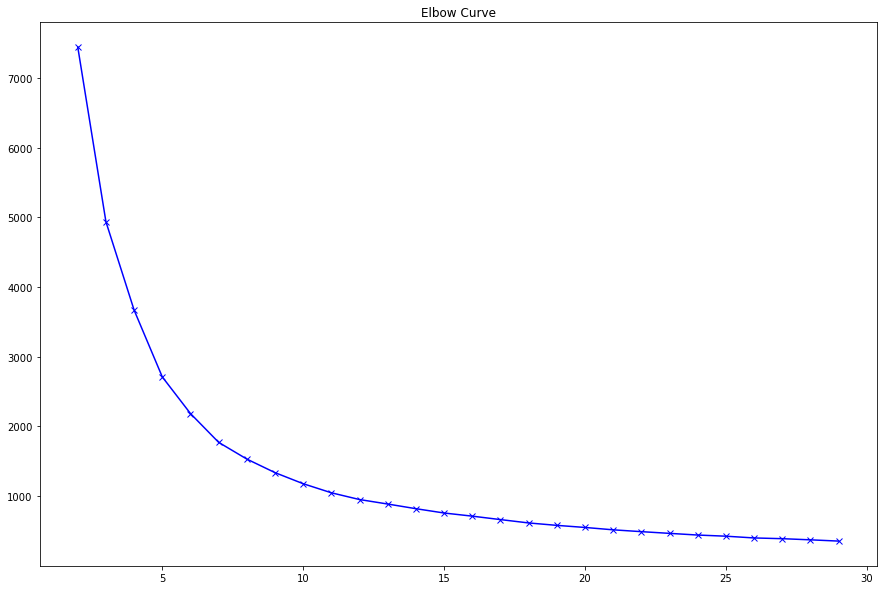

In [21]:
from sklearn.cluster import KMeans
X = new_df
distortions = []
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.title("Elbow Curve")

In [22]:
k_means = KMeans(n_clusters = 6)
new_df['groups'] = k_means.fit_predict(new_df)
new_df

,0,1,groups
2,-1.980389,-0.000348,2
5,0.470515,0.313427,1
7,-1.445307,-0.372802,5
9,-1.019053,-0.148543,5
10,-1.331253,-0.486855,5
...,...,...,...
10810,-0.190094,-0.326990,0
10811,-0.270515,-0.327883,0
10812,0.012382,-0.122895,0
10813,0.578190,0.287067,1


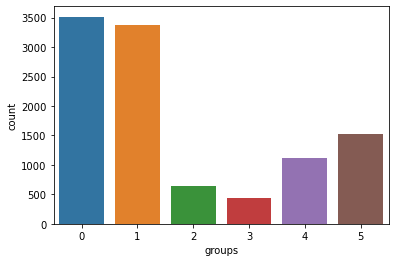

In [23]:
sns.countplot(new_df['groups'])

In [24]:
label=k_means.fit_predict(new_df)
u_labels=np.unique(label)

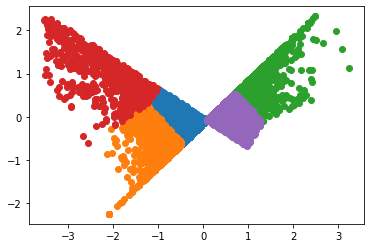

In [25]:
nv=new_df.values
for i in [0,1,2,3,4]:
    plt.scatter(nv[label == i, 0], nv[label == i, 1],label=i)

In [26]:
ind_list=new_df.index.values.tolist() 
titles=[]
languages=[]
for i in ind_list:
    titles.append(data["title"].iloc[i])
    languages.append(data["language_code"].iloc[i])
new_df["titles"]=titles
new_df["language"]=languages
new_df

,0,1,groups,titles,language
2,-1.980389,-0.000348,2,Harry Potter and the Chamber of Secrets (Harry...,eng
5,0.470515,0.313427,1,"Unauthorized Harry Potter Book Seven News: ""Ha...",en-US
7,-1.445307,-0.372802,5,The Ultimate Hitchhiker's Guide: Five Complete...,eng
9,-1.019053,-0.148543,5,The Hitchhiker's Guide to the Galaxy (Hitchhik...,eng
10,-1.331253,-0.486855,5,The Ultimate Hitchhiker's Guide (Hitchhiker's ...,eng
...,...,...,...,...,...
10810,-0.190094,-0.326990,0,Expelled from Eden: A William T. Vollmann Reader,eng
10811,-0.270515,-0.327883,0,You Bright and Risen Angels,eng
10812,0.012382,-0.122895,0,The Ice-Shirt (Seven Dreams #1),eng
10813,0.578190,0.287067,1,Poor People,eng


# Predictions based on the ratings,title and language

In [27]:
cols=["titles","groups","language"]
f=pd.DataFrame(data=new_df,columns=cols)
f.reset_index()

,index,titles,groups,language
0,2,Harry Potter and the Chamber of Secrets (Harry...,2,eng
1,5,"Unauthorized Harry Potter Book Seven News: ""Ha...",1,en-US
2,7,The Ultimate Hitchhiker's Guide: Five Complete...,5,eng
3,9,The Hitchhiker's Guide to the Galaxy (Hitchhik...,5,eng
4,10,The Ultimate Hitchhiker's Guide (Hitchhiker's ...,5,eng
...,...,...,...,...
10598,10810,Expelled from Eden: A William T. Vollmann Reader,0,eng
10599,10811,You Bright and Risen Angels,0,eng
10600,10812,The Ice-Shirt (Seven Dreams #1),0,eng
10601,10813,Poor People,1,eng


In [28]:
def autopredict(book):
    for title in data["title"]:
        if book in title:
            print(title)

In [29]:
autopredict("Harry Potter")

Harry Potter and the Half-Blood Prince (Harry Potter  #6)
Harry Potter and the Order of the Phoenix (Harry Potter  #5)
Harry Potter and the Chamber of Secrets (Harry Potter  #2)
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)
Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)
Unauthorized Harry Potter Book Seven News: "Half-Blood Prince" Analysis and Speculation
Harry Potter Collection (Harry Potter  #1-6)
Harry Potter Schoolbooks Box Set: Two Classic Books from the Library of Hogwarts School of Witchcraft and Wizardry
J.K. Rowling's Harry Potter Novels: A Reader's Guide
Harry Potter and the Half-Blood Prince (Harry Potter  #6)
Harry Potter Y La Piedra Filosofal (Harry Potter  #1)
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)
Looking for God in Harry Potter
Mugglenet.Com's What Will Happen in Harry Potter 7: Who Lives  Who Dies  Who Falls in Love and How Will the Adventure Finally End?
Harry Potter y el misterio del príncipe (Harry Potter  #6)
Harry Potter

In [30]:
f.sort_values("groups",inplace=True)
f.reset_index(inplace=True)

In [31]:
def get_index(title,df):
    return f[f["titles"]==title].index.tolist()[0]

In [32]:
def recommend_me(title,recommend_limit):
    index=get_index(title,f)
    clustered_indexes=[0,1676,4864,5888,6537,10177,10602]
    ind=6
    for i in clustered_indexes:
        if index<i:
            ind=(((clustered_indexes.index(i))))
            break

    k=clustered_indexes[ind]-index
    recommend_limit=10

    if(k<recommend_limit):
        remaining=recommend_limit-k
        for i in range(index,clustered_indexes[ind]):
            print(f.loc[i]["titles"])
        for i in range(index,index-remaining,-1):
            print(f.loc[i]["titles"])
    else:
        for i in range(index,index+recommend_limit):
            print(f.loc[i]["titles"])



In [33]:
recommend_me("Las aventuras de Tom Sawyer",10)

Las aventuras de Tom Sawyer
First Meetings in Ender's Universe (Ender's Saga  #0.5)
Geis of the Gargoyle (Xanth #18)
BSD Hacks
Arrowsmith / Elmer Gantry / Dodsworth
Tom Hunter: Living in Hell and Other Stories
Unicorn Point (Apprentice Adept #6)
Main Street
Var the Stick (Battle Circle  #2)
Choke


In [34]:
recommend_me("Absolute C++",10)

Absolute C++
Java: An Introduction to Problem Solving and Programming
Afterglow: A Last Conversation With Pauline Kael
Anti-Semite and Jew: An Exploration of the Etiology of Hate
The Mystery in the Rocky Mountains
Flirting With Danger (Samantha Jellicoe  #1)
Dark Water (Fog Point  #1)
The Outlaws of Sherwood
Spindle's End
Hitty  Her First Hundred Years


In [35]:
autopredict("Tom Sawyer")

Huck Finn & Tom Sawyer among the Indians & Other Unfinished Stories (Mark Twain Library)
Huck Finn and Tom Sawyer Among the Indians
The Adventures of Tom Sawyer and Adventures of Huckleberry Finn
The Adventures of Tom Sawyer (Adventures of Tom and Huck  #1)
The Adventures of Tom Sawyer (Adventures of Tom and Huck  #1)
Las aventuras de Tom Sawyer


In [36]:
def recommend_by_language(title,recommend_limit):
    index=get_index(title,f)
    lang=f.loc[index]["language"]
    ldf=pd.DataFrame(f)
    ldf.sort_values("language",inplace=True)
recommend_by_language("Las aventuras de Tom Sawyer",10)

In [37]:
f.sort_values("language",inplace=True)
f.reset_index(inplace=True)

In [38]:
def recommend_by_lang(title):
    index=get_index(title,f)
    language=f.loc[index]["language"]
    count=0
    while(language==f.loc[index]["language"] and count<10 and index<10602):
        print(f.loc[index]["titles"])
        index+=1
        count+=1

In [39]:
recommend_by_lang("The Best of Philip K. Dick")

The Best of Philip K. Dick
Sit  Walk  Stand
The Lord of the Rings: Complete Visual Companion
The Dark Tower (The Dark Tower #7)
A Higher Justice (The Trials of Kit Shannon #5)
The Modern Mind: An Intellectual History of the 20th Century
Molly Hatchet - 5 of the Best
Meeting God at Every Turn
William James: In the Maelstrom of American Modernism
The Portable Faulkner
